In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
cd /content/drive/My Drive/ML

/content/drive/My Drive/ML


In [0]:
train_folder = "./train"
valib_folder = "./validation"

In [0]:
import tensorflow as tf

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
model = Sequential()

In [8]:
model.add(Conv2D(16, (3,3), activation="relu", input_shape = (200,200,3)))
model.add(MaxPool2D(2, 2))
model.add(Conv2D(32, (3,3),activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Conv2D(64, (3,3),activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 33856)             0

In [0]:
from tensorflow.keras.optimizers import RMSprop

In [0]:
model.compile(loss = "binary_crossentropy", optimizer=RMSprop(learning_rate = 0.001), metrics=["acc"])

In [0]:
train_gen = ImageDataGenerator(rescale=1/255)
valid_gen = ImageDataGenerator(rescale=1/225)

In [12]:
gen_training_data = train_gen.flow_from_directory(
    train_folder,
    target_size = (200, 200),
    batch_size = 128,
    class_mode = "binary"
)

Found 1027 images belonging to 2 classes.


In [13]:
gen_validation_data = valid_gen.flow_from_directory(
    valib_folder,
    target_size = (200, 200),
    batch_size = 128,
    class_mode = "binary"
)

Found 256 images belonging to 2 classes.


In [14]:
H = model.fit_generator(
    gen_training_data,
    steps_per_epoch = 10,
    epochs = 10,
    verbose = 1,
    validation_data = gen_validation_data,
    validation_steps = 10
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
10/10 [==============================] - 177s 18s/step - loss: 3.6067 - acc: 0.5255 - val_loss: 0.6746 - val_acc: 0.6602
Epoch 2/10
10/10 [==============================] - 58s 6s/step - loss: 0.8791 - acc: 0.6952 - val_loss: 0.6474 - val_acc: 0.7234
Epoch 3/10
10/10 [==============================] - 58s 6s/step - loss: 0.3416 - acc: 0.8589 - val_loss: 0.6517 - val_acc: 0.7930
Epoch 4/10
10/10 [==============================] - 58s 6s/step - loss: 0.1377 - acc: 0.9489 - val_loss: 1.4603 - val_acc: 0.7461
Epoch 5/10
10/10 [==============================] - 58s 6s/step - loss: 0.2133 - acc: 0.9091 - val_loss: 0.5615 - val_acc: 0.8203
Epoch 6/10
10/10 [==============================] - 59s 6s/step - loss: 0.1220 - acc: 0.9593 - val_loss: 1.5246 - val_acc: 0.8156
Epoch 7/10
10/10 [==============================] - 59s 6s/step - loss: 0.0751 - acc: 0.9680 - val_loss: 1.4517 - val_acc: 0.8359
Epoch 8/10
1

In [0]:
model.save("classifiedHorseOrHuman.h5")

Saving tải xuống (2).jfif to tải xuống (2).jfif


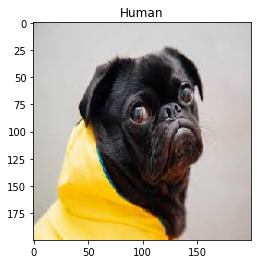

In [29]:
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
    path = "./" + fn
    img = image.load_img(path, target_size=(200,200))
    x = image.img_to_array(img) / 255
    x = np.expand_dims(x, axis = 0)
    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)

    if classes[0] > 0.5:
        plt.imshow(img)
        plt.title("Human")
    else:
        plt.imshow(img)
        plt.title("Horse")